In [1]:


# maths library for matrix manipulation
import numpy as np

# matplotlib is a library for plotting things inside Python
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# This is a library for reading and writing image files

from skimage import io

In [3]:
# a library for finding files
from scipy.spatial import distance
from sklearn import decomposition
import glob 

In [4]:


JPGList = glob.glob('/home/impett/Downloads/Annunc2/AnnuncsJun18/*/*.jpg')




In [5]:
len(JPGList)

505

In [6]:
allList = JPGList #[:100]

In [7]:
# allList is the list of all image file names

len(allList)

505

In [8]:
from skimage import feature

In [9]:
from skimage import transform

In [10]:
import tqdm

In [15]:
import pickle

In [16]:
from scipy.spatial import distance

In [17]:
n_components = 50
# ipca = decomposition.IncrementalPCA(n_components=n_components, batch_size=100)

In [ ]:
ipca = pickle.load( open( "hog-pca.p", "rb" ) )

In [23]:
L = len(allList)
imf = np.zeros((L*100,n_components))

In [24]:
imCrops = []
k = 0

for fileName in tqdm.tqdm(allList):
    im = io.imread(fileName)
    
    for j in range(100):
        myshape = np.shape(im)
        w = myshape[0]
        h = myshape[1]
        maxHeight = np.min([w,h])
        size = np.random.randint(low=50,high=np.min([maxHeight,150]))
        minw = np.random.randint(w - size)
        maxw = np.random.randint(h - size)

        newim = im[minw:minw+size,maxw:maxw+size,:]
        imr = transform.resize(newim,(256,256))
#         allImageSections.append(imr)
        F = feature.hog(imr,  pixels_per_cell=(16,16)  )
#         imageFeatureSections.append(F)
        imCrops.append([fileName, minw,minw+size,maxw,maxw+size])
        imf[k,:] = ipca.transform(F.reshape(1,-1))
        k += 1


  0%|          | 0/505 [00:00<?, ?it/s]/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)

 28%|██▊       | 139/505 [06:40<17:34,  2.88s/it]


 58%|█████▊    | 293/505 [14:03<10:10,  2.88s/it]


 89%|████████▊ | 447/505 [20:53<02:42,  2.80s/it]


100%|██████████| 505/505 [23:19<00:00,  2.77s/it]


In [25]:
print('ready')

ready


In [27]:
def showImSection(mylist):
    myim = io.imread(mylist[0])
    return myim[mylist[1]:mylist[2],mylist[3]:mylist[4]]

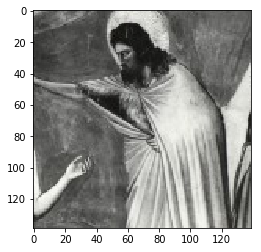

In [28]:
plt.imshow(showImSection(imCrops[3]))

In [ ]:
# for i in tqdm.tqdm(range(L)):
#     imf[i,:] = ipca.transform(imageFeatureSections[i].reshape(1,-1))

In [ ]:
# del imageFeatureSections

In [29]:
import pickle

In [31]:
search = {}
search['pca'] = ipca
search['features'] = imf
search['crops'] = imCrops

In [32]:
pickle.dump( search, open( "save.p", "wb" ) )

In [ ]:
# pickle.dump( ipca, open( "hog-pca.p", "wb" ) )

In [ ]:
imf_pca = ipca.transform(imf)

In [ ]:
np.shape(imf_pca)

In [ ]:
mydistances = distance.squareform(distance.pdist(imf_pca))

In [ ]:
search_im = np.random.randint(low=0,high=1000)
# search_im = 533
plt.imshow(showImSection(imCrops[search_im]))
print(search_im)

In [ ]:
plt.figure(figsize=(15,15))
idx = np.argsort(mydistances[search_im,:])
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow( showImSection(imCrops[idx[i]]))
    plt.axis('off')
#     plt.title('Distance: ' + str(mydistances[search_im,idx[i]]))
    plt.title('Image: ' + str(imCrops[idx[i]][0].split('/')[-1]))

In [ ]:
plt.hist(mydistances[search_im,:],100);

In [ ]:
testIm = io.imread(allList[5])

In [ ]:
%matplotlib nbagg
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(testIm)
coords = []
def onclick(event):
    coords.append( [event.xdata, event.ydata])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [ ]:
xmin = int(coords[0][0])
ymin = int(coords[0][1])
xmax = int(coords[1][0])
ymax = int(coords[1][1])

In [ ]:
[xmin, xmax, ymin, ymax]

In [ ]:
%matplotlib inline
plt.imshow(testIm[ymin:ymax,xmin:xmax,:])

In [ ]:
queryIm = testIm[ymin:ymax,xmin:xmax,:]
queryIm = transform.resize(queryIm,(256,256,3))
queryF = feature.hog(queryIm,  pixels_per_cell=(16,16)  )

In [ ]:
# querydistances = distance.cdist(imf,queryF.reshape(1,-1))

qf_pca = mypca.transform(queryF.reshape(1,-1))
querydistances = distance.cdist(imf_pca,qf_pca)

In [ ]:
np.shape(imf)

In [ ]:
plt.hist(querydistances,100);

In [ ]:
plt.figure(figsize=(15,15))
idx = np.argsort(querydistances,axis=0)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow( showImSection(imCrops[  [idx[i][0]][0]      ]))
    plt.axis('off')
#     plt.title('distance = ' + str(querydistances[idx[i][0]]))
    plt.title('Crop number: ' + str(idx[i]))